# <font color='#ff194b'>Case Study 7 - Athul P J</font>

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
pd.set_option("display.max_columns", None)
df.groupby('Classification').describe()

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                                                                 PL            \
                     mean       std  min  25%  50%   75%  max count      mean   
Classification                                                                  
Iris-setosa      3.408511  0.390557  2.3  3.1  3.4  3.65  4.4  48.0  1.468750   
Iris-versicolor  2.781250  0.315322  2.0  2.6  2.8  3.00  3.4  48.0  4.252083   
Iris-virginica   2.967347  0.322353  2.2  2.8  3.0  3.10  3.8  48.0  5.547917   

                                                         PW                   \
                      std  min  25%   50%    75%  max count   mean       std   
Classification                                                                 
Iris-setosa      0.175228  1.0  1.4  1.50  1.600  1.9  50.0  0.244  0.107210   
Iris-versicolor  0.475345  3.0  4.0  4.35  4.600  5.1  50.0  1.326  0.197753   
Iris-virginica   0.555433  4.5  5.1  5.55  5.825  6.9  50.0  2.026  0.274650   

                                          
                 min  25%  50%  75%  max  
Classification                            
Iris-setosa      0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   1.4  1.8  2.0  2.3  2.5

In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

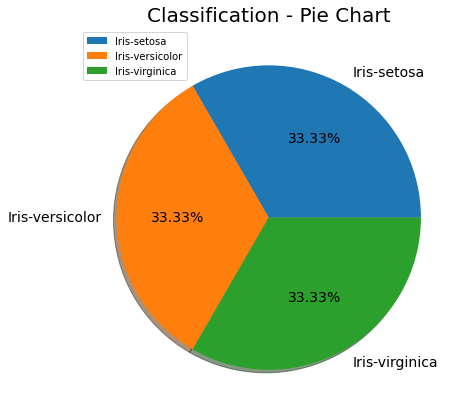

<AxesSubplot:xlabel='Classification', ylabel='count'>

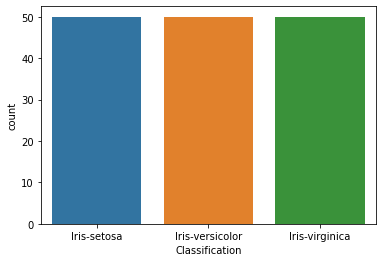

In [12]:
plt.figure(figsize=(7,7))
l=df['Classification'].value_counts()
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 14},autopct='%1.2f%%')
plt.legend(fontsize=10,loc="best")
plt.title("Classification - Pie Chart",fontsize=20)
plt.show()

sns.countplot(x = df['Classification'])

In [13]:
# Equal no of data items for all 3 classifications

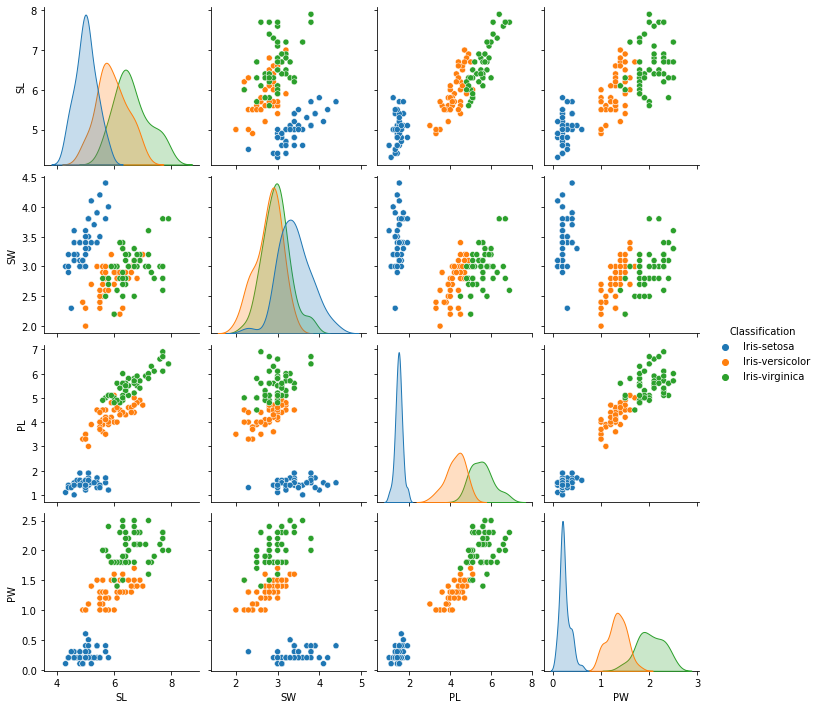

In [14]:
sns.pairplot(df,hue='Classification')

In [16]:
print(df.info())
print("\n\n\n\n\n",df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None





 SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


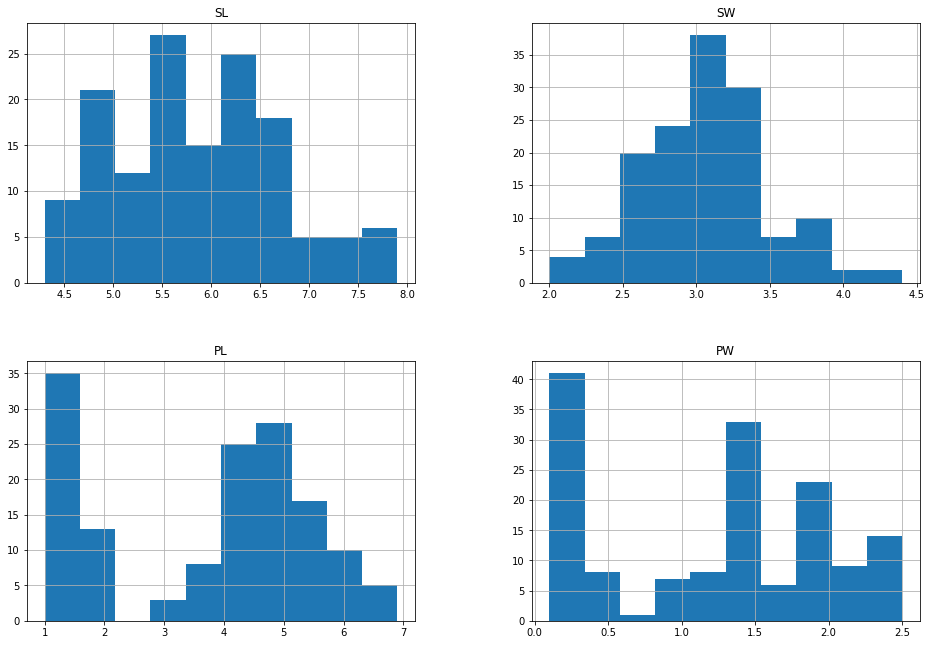

In [43]:
fgraph = df.select_dtypes(include='float')
fgraph.hist(figsize=(16,11))
plt.show()

In [44]:
# Handling Missing Values

In [45]:
print(df.columns)
print(df.isna().sum())

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')
SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


In [46]:
for i in ['SL', 'SW', 'PL']:
    df[i] = df[i].fillna(df[i].mean())
    
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [47]:
# Checking for outliers and handling them

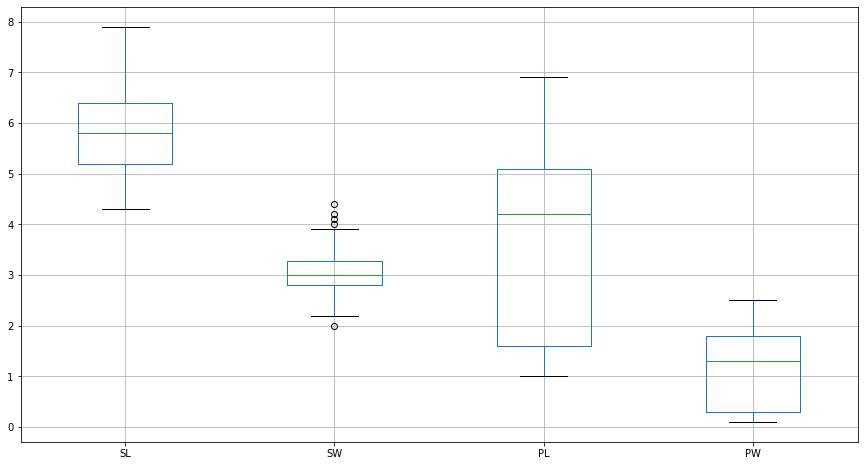

In [48]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

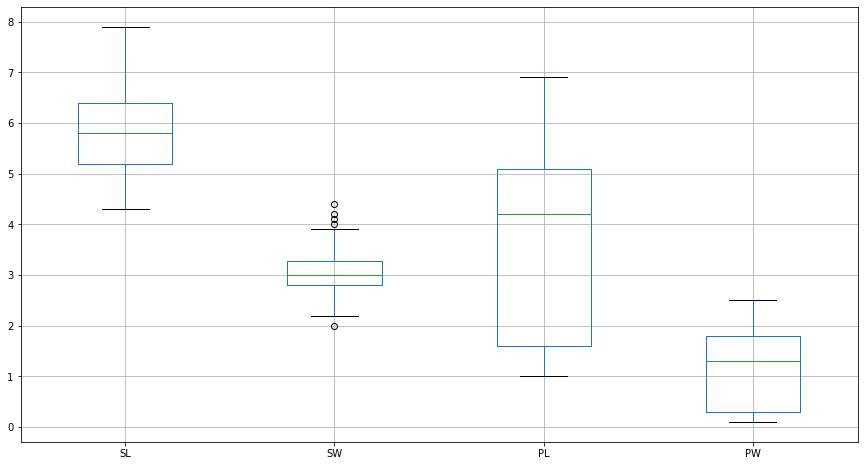

In [49]:
# Removing Outliers from SW

q1 = df.SW.quantile(0.25)
q2 = df.SW.quantile(0.50)
q3 = df.SW.quantile(0.75)

iqr = q3 - q1

lowerLimit = iqr - (1.5*q1)
upperLimit = iqr + (1.5*q3)

df = df[(df.SW > lowerLimit) & (df.SW < upperLimit) ]


plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

In [50]:
df.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
# Label Encoding the classification column

In [52]:
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
df['Classification'] = labelEn.fit_transform(df['Classification'])

df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


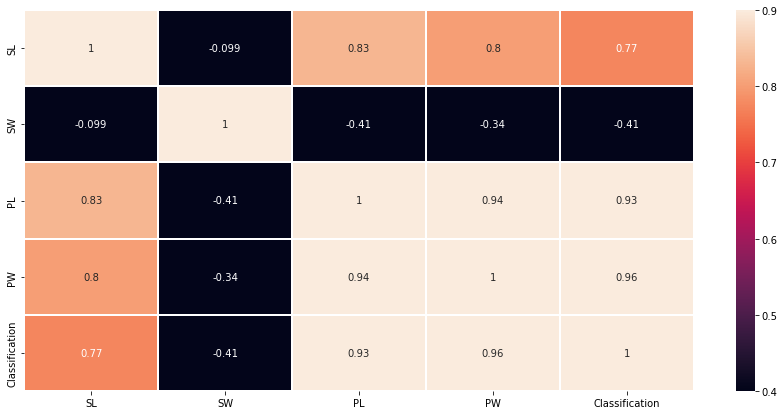

In [54]:
plt.figure(figsize=(15,7))
cmatrix = df.corr()
sns.heatmap(cmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2) 
plt.show()

In [55]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [56]:
y = df['Classification']
x = df.drop('Classification',axis=1)

In [57]:
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)
x['skew'] = x[['SW', 'SL', 'PW', 'PL']].skew(axis = 1)
x['kurt'] = x[['SW', 'SL', 'PW', 'PL']].kurt(axis = 1)

In [58]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum', 'skew', 'kurt'], dtype='object')

In [59]:
# Splitting Data

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [60]:
#Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)


In [61]:
# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

In [67]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix,recall_score,precision_score


In [69]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("Precision Score is : ",precision_score(ypred,ytest,average ='micro'))
print("Recall Score is : ",recall_score(ypred,ytest,average = 'micro'))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9333333333333333
Precision Score is :  0.9333333333333333
Recall Score is :  0.9333333333333333
F1 Score is :  0.9333333333333333


In [70]:
confusion_matrix(ypred,ytest)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [71]:
# KNN Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(xtrain, ytrain)
    y_pred =  classifier.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

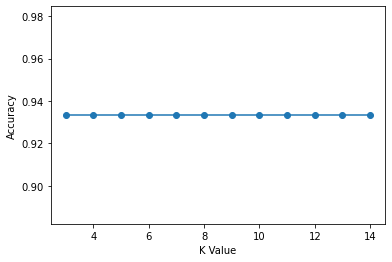

In [75]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")

In [76]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(xtrain, ytrain)
ypred =  classifier.predict(xtest) 

In [77]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("Precision Score is : ",precision_score(ypred,ytest,average ='micro'))
print("Recall Score is : ",recall_score(ypred,ytest,average = 'micro'))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9333333333333333
Precision Score is :  0.9333333333333333
Recall Score is :  0.9333333333333333
F1 Score is :  0.9333333333333333


In [78]:
# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)
ypred=dt_model.predict(xtest)

In [80]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("Precision Score is : ",precision_score(ypred,ytest,average ='micro'))
print("Recall Score is : ",recall_score(ypred,ytest,average = 'micro'))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9
Precision Score is :  0.9
Recall Score is :  0.9
F1 Score is :  0.9


In [81]:
confusion_matrix(ypred,ytest)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]])

In [83]:
# SVM - linear

In [84]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(xtrain, ytrain)
ypred = svm_linear.predict(xtest)

In [85]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("Precision Score is : ",precision_score(ypred,ytest,average ='micro'))
print("Recall Score is : ",recall_score(ypred,ytest,average = 'micro'))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9333333333333333
Precision Score is :  0.9333333333333333
Recall Score is :  0.9333333333333333
F1 Score is :  0.9333333333333333


In [86]:
confusion_matrix(ypred,ytest)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [87]:
#Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [89]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("Precision Score is : ",precision_score(ypred,ytest,average ='micro'))
print("Recall Score is : ",recall_score(ypred,ytest,average = 'micro'))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9333333333333333
Precision Score is :  0.9333333333333333
Recall Score is :  0.9333333333333333
F1 Score is :  0.9333333333333333


In [90]:
confusion_matrix(ypred,ytest)

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]])

In [91]:
# Feature Importance

In [92]:
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

PW      30.627751
kurt    16.498051
sum     15.751050
mean    13.608944
PL      11.655975
SL       4.667137
SW       3.892043
skew     3.299051
dtype: float64

In [93]:
# PW column has got more importance

# Comparing various models f1 score Random forest except decision tree all the others good and they are neither
# overfitting nor underfitting